# Aims
This coursework aims to provide a practical context to concepts covered in early weeks surrounding artificial neural networks. You will be required to conduct practical work with Python, and to write a brief report outlining your work.

# Task 
Feedforward Neural Networks You will implement a feedforward artificial neural network (ANN) within Python (using Keras)
for the purposes of solving a binary classification task as a mini-research project. For this network, you will be provided a dataset from the finance sector. A description of the dataset is provided in the Data Fields section of this document below.

### Importing Libraries

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from summarytools import dfSummary

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras import backend as K
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential

from itertools import chain

### Importing data

In [72]:
df = pd.read_csv('./bank.csv')
df.head(1450)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,32,self-employed,married,secondary,no,413,yes,no,cellular,11,jul,712,2,-1,0,unknown,no
1446,32,technician,single,tertiary,no,4665,yes,no,unknown,21,may,860,2,-1,0,unknown,yes
1447,45,admin.,married,secondary,no,638,yes,no,cellular,20,aug,75,9,-1,0,unknown,no
1448,32,blue-collar,married,secondary,no,101,yes,no,unknown,19,may,191,4,-1,0,unknown,no


#### Attribute Information:

##### bank client data:
- 1 - age (numeric)
- 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- 5 - default: has credit in default? (categorical: 'no','yes','unknown')
- 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
- 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
##### related with the last contact of the current campaign:
- 8 - contact: contact communication type (categorical: 'cellular','telephone')
- 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- 10 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. 
##### other attributes:
- 11 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 12 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- 13 - previous: number of contacts performed before this campaign and for this client (numeric)
- 14 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

In [73]:
df.shape

(4521, 17)

### Exploratory Data Anlysis

In [74]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [75]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


In [76]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Data Visualization

In [77]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,age[int64],Mean (sd) : 41.2 (10.6)min < med < max:19.0 < 39.0 < 87.0IQR (CV) : 16.0 (3.9),67 distinct values,,0(0.0%)
2,job[object],1. management2. blue-collar3. technician4. admin.5. services6. retired7. self-employed8. entrepreneur9. unemployed10. housemaid11. other,969 (21.4%)946 (20.9%)768 (17.0%)478 (10.6%)417 (9.2%)230 (5.1%)183 (4.0%)168 (3.7%)128 (2.8%)112 (2.5%)122 (2.7%),,0(0.0%)
3,marital[object],1. married2. single3. divorced,"2,797 (61.9%)1,196 (26.5%)528 (11.7%)",,0(0.0%)
4,education[object],1. secondary2. tertiary3. primary4. unknown,"2,306 (51.0%)1,350 (29.9%)678 (15.0%)187 (4.1%)",,0(0.0%)
5,default[object],1. no2. yes,"4,445 (98.3%)76 (1.7%)",,0(0.0%)
6,balance[int64],Mean (sd) : 1422.7 (3009.6)min < med < max:-3313.0 < 444.0 < 71188.0IQR (CV) : 1411.0 (0.5),"2,353 distinct values",,0(0.0%)
7,housing[object],1. yes2. no,"2,559 (56.6%)1,962 (43.4%)",,0(0.0%)
8,loan[object],1. no2. yes,"3,830 (84.7%)691 (15.3%)",,0(0.0%)
9,contact[object],1. cellular2. unknown3. telephone,"2,896 (64.1%)1,324 (29.3%)301 (6.7%)",,0(0.0%)
10,day[int64],Mean (sd) : 15.9 (8.2)min < med < max:1.0 < 16.0 < 31.0IQR (CV) : 12.0 (1.9),31 distinct values,,0(0.0%)


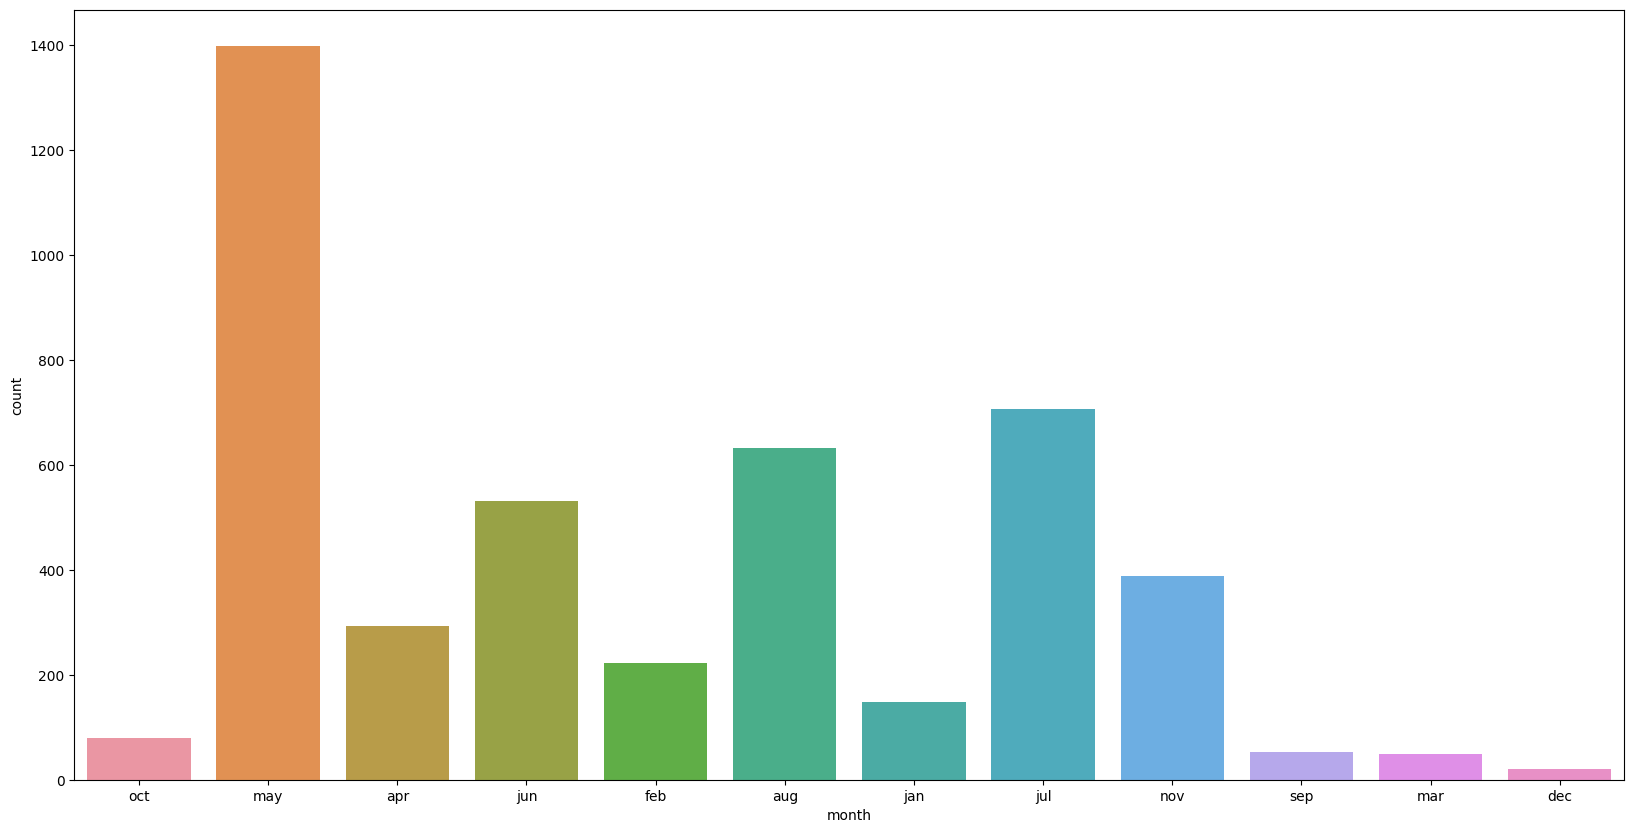

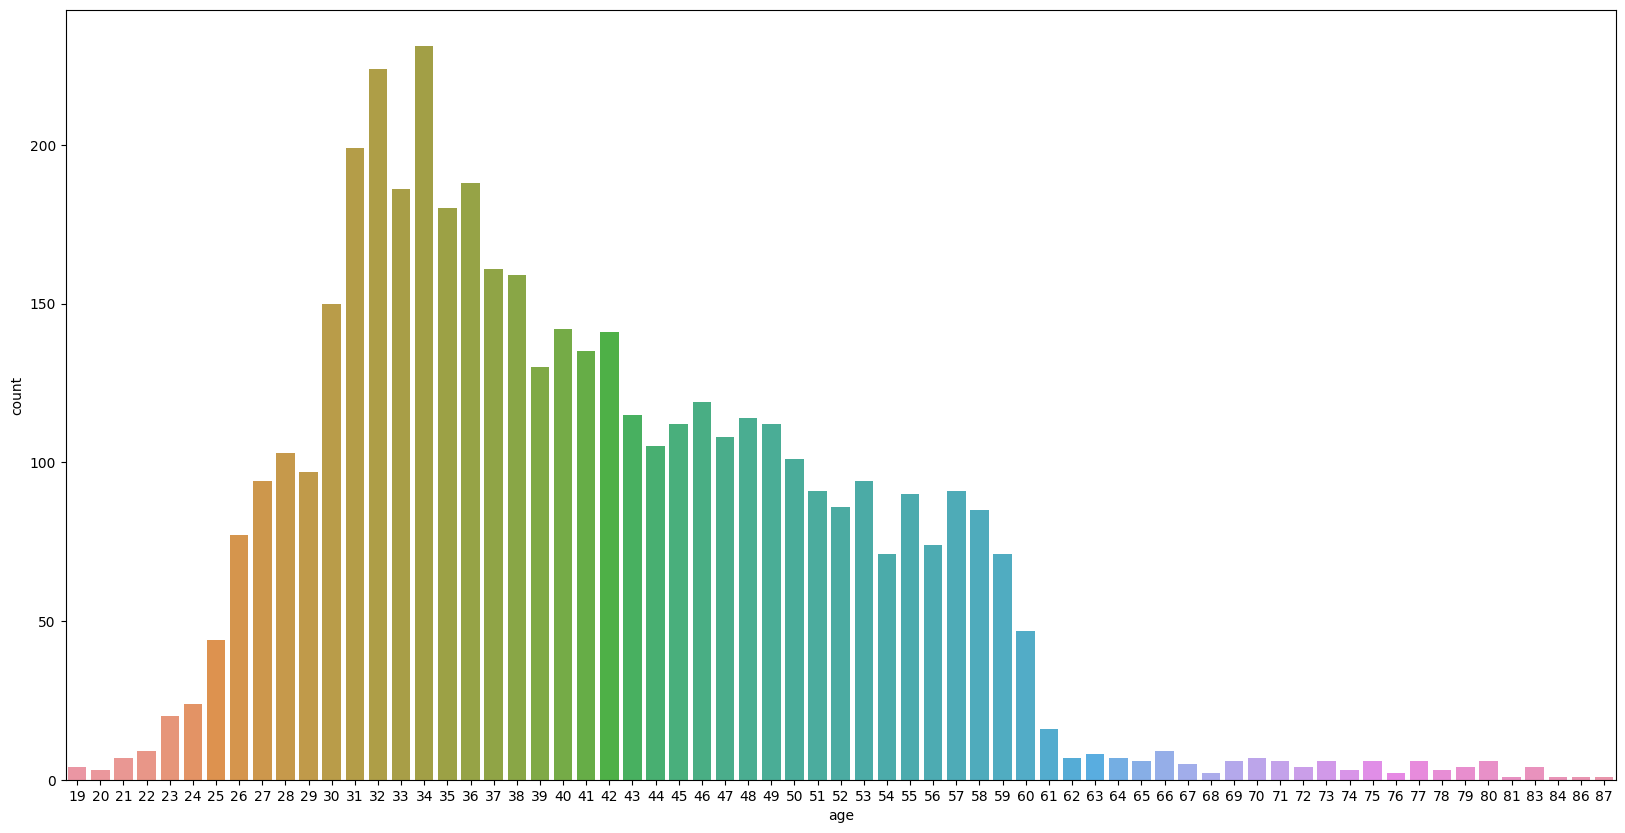

In [78]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['month'])
plt.show()

plt.figure(figsize=(20,10))
sns.countplot(x=df['age'])
plt.show()

/tmp/ipykernel_138824/2032428670.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ht = df.corr()


<AxesSubplot:>

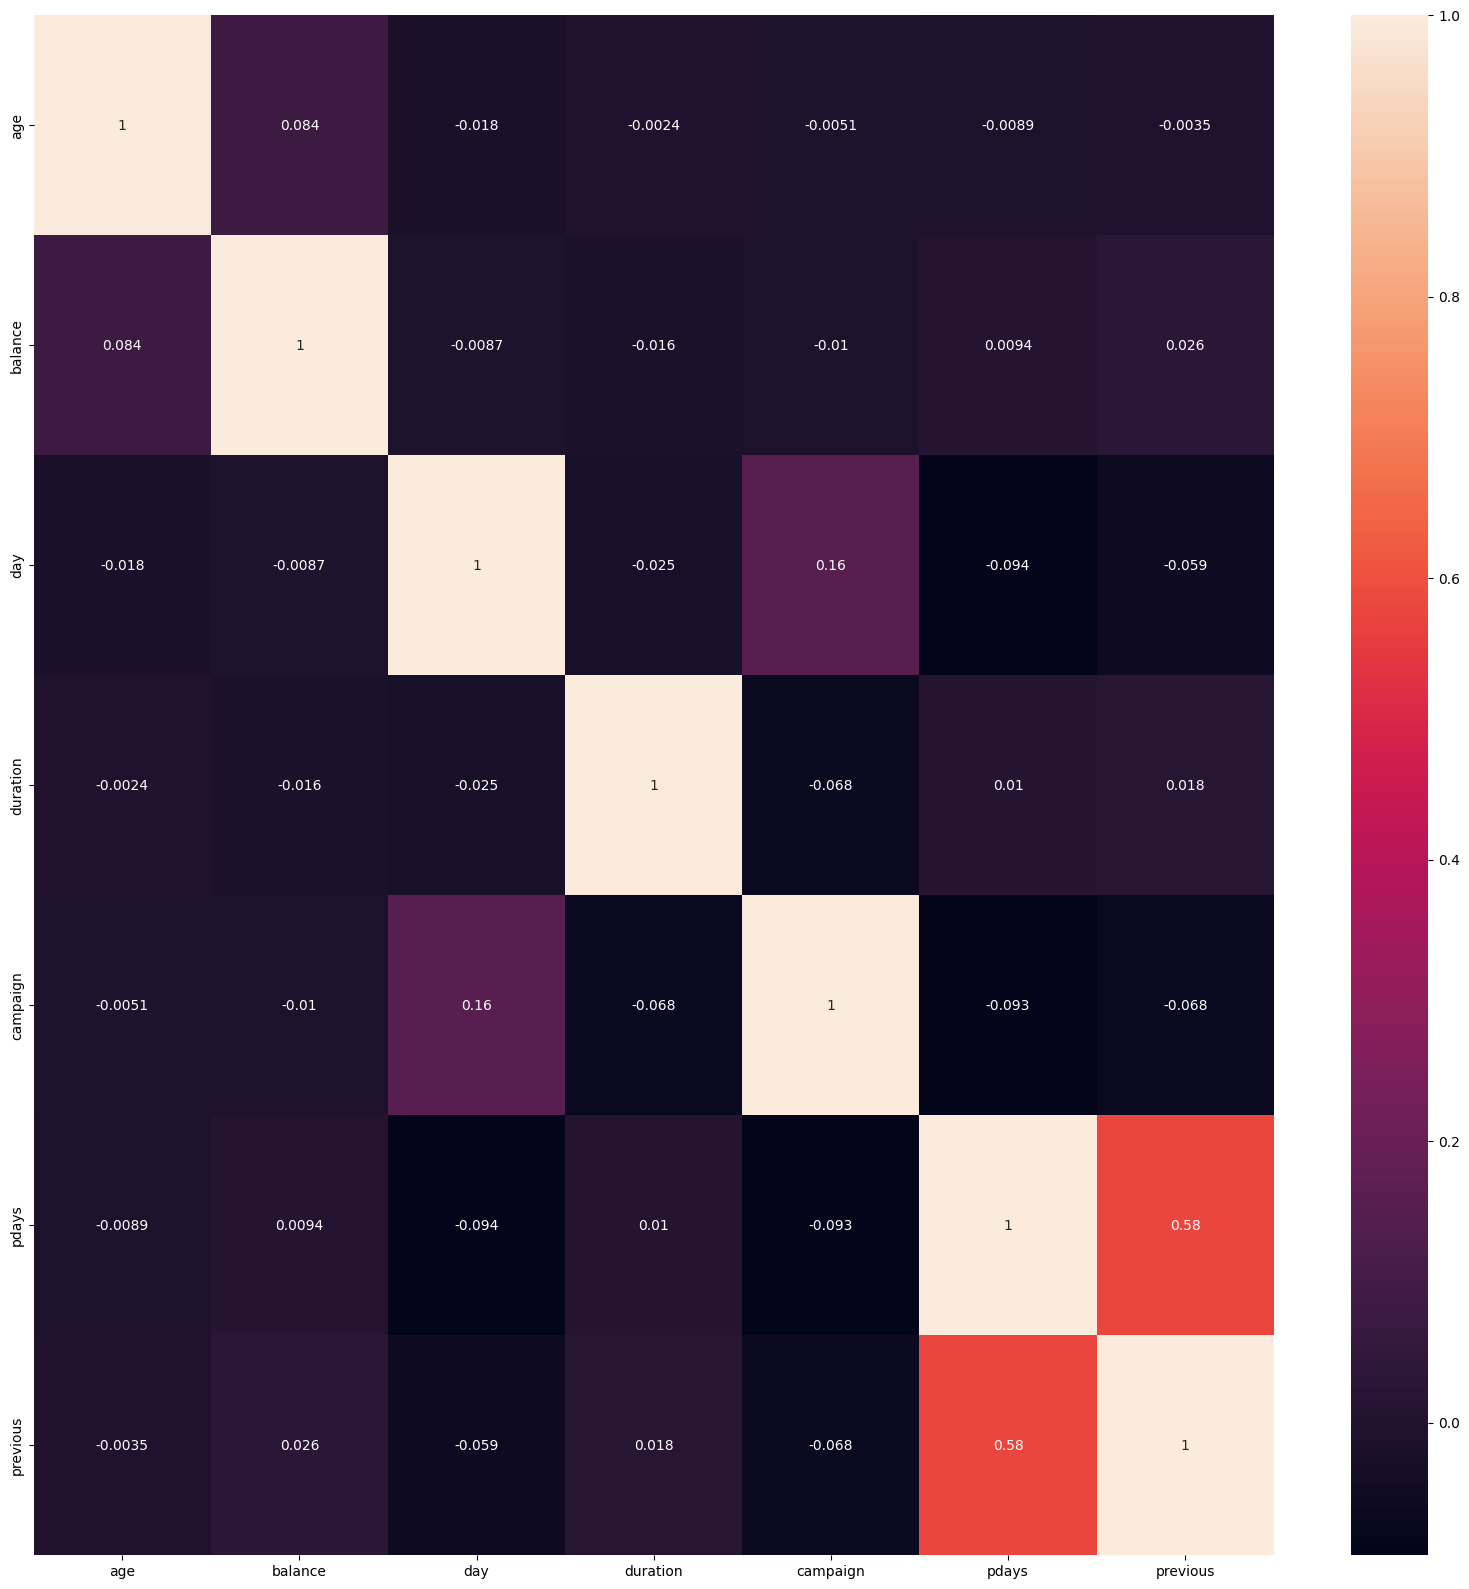

In [79]:
ht = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(ht, annot=True)

### Data Preparation

Encoding

In [80]:
# default encoding
binar = LabelBinarizer().fit(df.loc[:, "default"])
df["default"] = binar.transform(df["default"])

# housing encoding
binar = LabelBinarizer().fit(df.loc[:, "housing"])
df["housing"] = binar.transform(df["housing"])

# loan encoding
binar = LabelBinarizer().fit(df.loc[:, "loan"])
df["loan"] = binar.transform(df["loan"])

# y encoding
binar = LabelBinarizer().fit(df.loc[:, "y"])
df["y"] = binar.transform(df["y"])

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,1,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,0,295,0,0,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,0,1137,0,0,cellular,6,feb,129,4,211,3,other,0


In [81]:
df_job = pd.get_dummies(df.job)

df_contact = pd.get_dummies(df.contact)

df_marital = pd.get_dummies(df.marital)

df_education = pd.get_dummies(df.education)

df_poutcome = pd.get_dummies(df.poutcome)
df_poutcome

,failure,other,success,unknown
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
4516,0,0,0,1
4517,0,0,0,1
4518,0,0,0,1
4519,0,1,0,0


In [82]:
df_new = pd.concat([df, df_job, df_contact,df_marital, df_education, df_poutcome], axis=1)

In [83]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            4521 non-null   int64 
 1   job            4521 non-null   object
 2   marital        4521 non-null   object
 3   education      4521 non-null   object
 4   default        4521 non-null   int64 
 5   balance        4521 non-null   int64 
 6   housing        4521 non-null   int64 
 7   loan           4521 non-null   int64 
 8   contact        4521 non-null   object
 9   day            4521 non-null   int64 
 10  month          4521 non-null   object
 11  duration       4521 non-null   int64 
 12  campaign       4521 non-null   int64 
 13  pdays          4521 non-null   int64 
 14  previous       4521 non-null   int64 
 15  poutcome       4521 non-null   object
 16  y              4521 non-null   int64 
 17  admin.         4521 non-null   uint8 
 18  blue-collar    4521 non-null

In [84]:
feature_name = ['age', 	'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed', 'cellular', 'telephone', 'divorced', 'married', 'single', 'primary', 'secondary', 'tertiary', 'default', 'balance', 'housing', 'day', 'duration', 'campaign', 'pdays', 'previous', 'failure', 'other', 'success']
dfX = df_new[feature_name]
dfY = df_new['loan']

In [85]:
scaler = MinMaxScaler()

In [86]:
scaler.fit(dfX)

MinMaxScaler()

In [87]:
dfX = scaler.transform(dfX)

In [88]:
dfX = pd.DataFrame(dfX, columns=feature_name)

In [89]:
dfX.head()

,age,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,...,balance,housing,day,duration,campaign,pdays,previous,failure,other,success
0,0.161765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.068455,0.0,0.600000,0.024826,0.000000,0.000000,0.00,0.0,0.0,0.0
1,0.205882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.108750,1.0,0.333333,0.071500,0.000000,0.389908,0.16,1.0,0.0,0.0
2,0.235294,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.062590,1.0,0.500000,0.059914,0.000000,0.379587,0.04,1.0,0.0,0.0
3,0.161765,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.064281,1.0,0.066667,0.064548,0.061224,0.000000,0.00,0.0,0.0,0.0
4,0.588235,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.044469,1.0,0.133333,0.073486,0.000000,0.000000,0.00,0.0,0.0,0.0


In [90]:
df.loan.sum() / len(df)

0.1528422915284229

### Set Artifial neural network and Learning

In [91]:
model = Sequential()

model.add(Dense(32, input_dim=31, activation="elu", kernel_initializer="he_normal"))
model.add(Dense(64, activation="elu", kernel_initializer="he_normal"))
model.add(Dense(128, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.Dropout(0.2))

model.add(Dense(512, activation="elu", kernel_initializer="he_normal"))
model.add(Dense(1024, activation="elu", kernel_initializer="he_normal"))
model.add(Dense(512, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.Dropout(0.2))

model.add(Dense(512, activation="elu", kernel_initializer="he_normal"))
model.add(Dense(1024, activation="elu", kernel_initializer="he_normal"))
model.add(Dense(512, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.Dropout(0.2))

model.add(Dense(128, activation="elu", kernel_initializer="he_normal"))
model.add(Dense(64, activation="elu", kernel_initializer="he_normal"))
model.add(Dense(32, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="SGD", loss='binary_crossentropy', metrics=["binary_accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 32)                1024      
                                                                 
 dense_14 (Dense)            (None, 64)                2112      
                                                                 
 dense_15 (Dense)            (None, 128)               8320      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 512)               66048     
                                                                 
 dense_17 (Dense)            (None, 1024)              525312    
                                                                 
 dense_18 (Dense)            (None, 512)              

In [92]:
model_result = model.fit(dfX, dfY, batch_size=100, epochs=100, validation_split=0.2, shuffle=True, verbose=2)

Epoch 1/100
37/37 - 7s - loss: 0.5820 - binary_accuracy: 0.7962 - val_loss: 0.4397 - val_binary_accuracy: 0.8608 - 7s/epoch - 187ms/step
Epoch 2/100
37/37 - 4s - loss: 0.4924 - binary_accuracy: 0.8236 - val_loss: 0.4108 - val_binary_accuracy: 0.8619 - 4s/epoch - 117ms/step
Epoch 3/100
37/37 - 4s - loss: 0.4708 - binary_accuracy: 0.8294 - val_loss: 0.4019 - val_binary_accuracy: 0.8619 - 4s/epoch - 106ms/step
Epoch 4/100
37/37 - 4s - loss: 0.4655 - binary_accuracy: 0.8374 - val_loss: 0.4085 - val_binary_accuracy: 0.8619 - 4s/epoch - 98ms/step
Epoch 5/100
37/37 - 4s - loss: 0.4607 - binary_accuracy: 0.8377 - val_loss: 0.3973 - val_binary_accuracy: 0.8619 - 4s/epoch - 98ms/step
Epoch 6/100
37/37 - 3s - loss: 0.4558 - binary_accuracy: 0.8396 - val_loss: 0.4018 - val_binary_accuracy: 0.8619 - 3s/epoch - 94ms/step
Epoch 7/100
37/37 - 3s - loss: 0.4621 - binary_accuracy: 0.8407 - val_loss: 0.3993 - val_binary_accuracy: 0.8619 - 3s/epoch - 93ms/step
Epoch 8/100
37/37 - 3s - loss: 0.4540 - binar

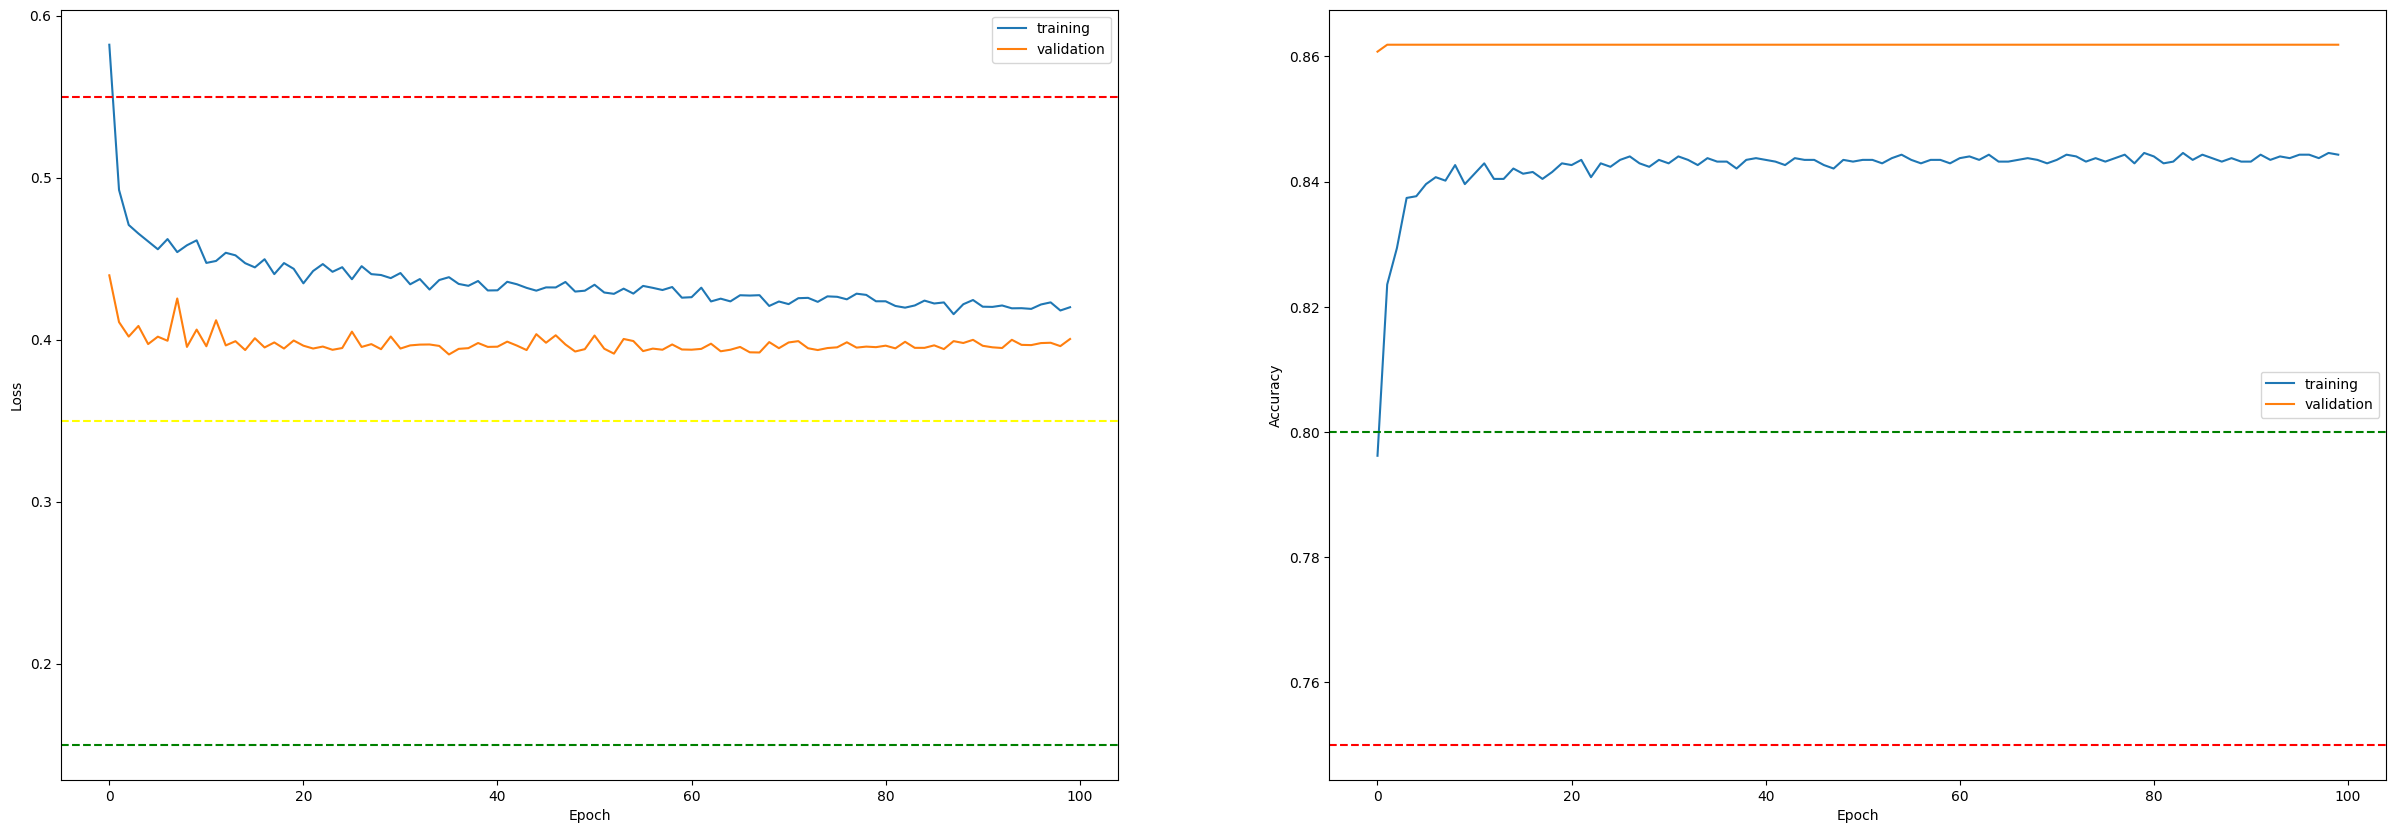

In [93]:
plt.figure(figsize=(30, 10))

plt.subplot(1, 2, 1)
plt.plot(model_result.history["loss"], label="training")
plt.plot(model_result.history["val_loss"], label="validation")
plt.axhline(0.55, c="red", linestyle="--")
plt.axhline(0.35, c="yellow", linestyle="--")
plt.axhline(0.15, c="green", linestyle="--")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(model_result.history["binary_accuracy"], label="training")
plt.plot(model_result.history["val_binary_accuracy"], label="validation")
plt.axhline(0.75, c="red", linestyle="--")
plt.axhline(0.80, c="green", linestyle="--")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

### Predict_OUTPUT

In [94]:
test_new = pd.concat([df, df_job, df_contact,df_marital, df_education, df_poutcome], axis=1)

In [95]:
testX = test_new[feature_name]

In [96]:
testX = scaler.transform(testX)

In [97]:
testX = pd.DataFrame(testX, columns=feature_name)
testX.head()

,age,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,...,balance,housing,day,duration,campaign,pdays,previous,failure,other,success
0,0.161765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.068455,0.0,0.600000,0.024826,0.000000,0.000000,0.00,0.0,0.0,0.0
1,0.205882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.108750,1.0,0.333333,0.071500,0.000000,0.389908,0.16,1.0,0.0,0.0
2,0.235294,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.062590,1.0,0.500000,0.059914,0.000000,0.379587,0.04,1.0,0.0,0.0
3,0.161765,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.064281,1.0,0.066667,0.064548,0.061224,0.000000,0.00,0.0,0.0,0.0
4,0.588235,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.044469,1.0,0.133333,0.073486,0.000000,0.000000,0.00,0.0,0.0,0.0


In [98]:
y_pred = model.predict(testX)

In [99]:
y_pred = list(chain.from_iterable(y_pred))

In [102]:
my_submission = pd.DataFrame({'age': df.age, 'loan': y_pred})
my_submission.to_csv('submission.csv', index=False)